Q4. A group of 20 friends decide to play a game in which they each write a number
between 1 and 20 on a slip of paper and put it into a hat. They then draw one slip of paper
at random. What is the probability that the number on the slip of paper is a perfect square
(i.e., 1, 4, 9, or 16)?

##### solution :

number of observations=20

perfect squares = 4

prob(getting perfect square)=4/20 = 1/5 = 20%

Q5. A certain city has two taxi companies: Company A has 80% of the taxis and
Company B has 20% of the taxis. Company A's taxis have a 95% success rate for picking
up passengers on time, while Company B's taxis have a 90% success rate. If a randomly
selected taxi is late, what is the probability that it belongs to Company A?

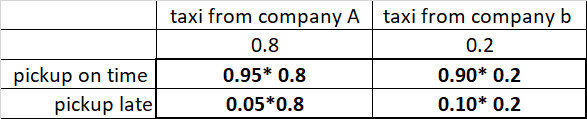

As seen above- Solution is :
prob( taxi belonging to A given it is late is ) = prob(taxi belonging to A)/ prob( taxi is late )

prob( txi is late)= 0.05*0.8 + 0.10*0.2 = 0.06

prob(taxi belonging to A and late )= 0.05*0.8

so prob(taxi beloning to A given it is late )= 0.05*0.8/0.06 = 0.66 -----> 66%

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns 

Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [28]:
data=pd.read_csv(r"D:\ML\blood_pressure.csv")
data

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [29]:
data['change_in_BP']= data[' Blood Pressure Before (mmHg)']-data[' Blood Pressure After (mmHg)']
data['change_in_BP']

0     10
1      7
2      2
3      8
4      8
      ..
95     7
96     6
97     4
98     4
99     5
Name: change_in_BP, Length: 100, dtype: int64

#### Assume alpha =0.05 , we are calculating the p value of the data 

1. if p val> alpha, then we fail to reject null hypothesis that data follows normal distribution
2. if p val< alpha, then we accept the null hypothesis that data follows normal distribution 

In [30]:
# to see if the change in blood pressure follow normal distribution, we do normality test on data - we use shapiro-wilko test 
statistic, p_value =stats.shapiro(data['change_in_BP'])

print(statistic, p_value)

# since p val < alpha , we accept the NULL HYPOTHESIS. 


0.9538205862045288 0.0014940275577828288


<AxesSubplot:xlabel='change_in_BP', ylabel='Count'>

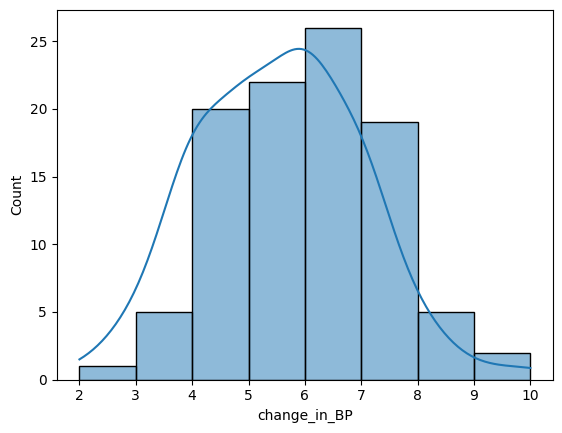

In [31]:
import seaborn as sns 
sns.histplot(data['change_in_BP'], kde=True)

In [32]:
data.head(3)

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg),change_in_BP
0,1,130,120,10
1,2,142,135,7
2,3,120,118,2


Q-8. The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels. The data is given below: Participant
Before therapy After therapy Difference

In [33]:
df2=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\book2.csv")
df2.head(10)

,Participant,Before therapy,After therapy,Difference
0,1.0,10.0,7.0,-3.0
1,2.0,8.0,6.0,-2.0
2,3.0,12.0,10.0,-2.0
3,4.0,15.0,12.0,-3.0
4,5.0,6.0,5.0,-1.0
5,6.0,9.0,8.0,-1.0
6,7.0,11.0,9.0,-2.0
7,8.0,7.0,6.0,-1.0
8,9.0,14.0,12.0,-2.0
9,10.0,10.0,8.0,-2.0


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant     10 non-null     float64
 1   Before therapy  10 non-null     float64
 2   After therapy   10 non-null     float64
 3   Difference      10 non-null     float64
dtypes: float64(4)
memory usage: 544.0 bytes


In [42]:
#H0 = therapy didnot have significant effect on anxiety levels => means before therapy levels ~ after therapy levels
#H1 = therapy had significant effect on anxiety levels => means after therapy levels are either higher or lower than before therapy levels 

#wilcoxon test - used when the data do not meet the assumptions of normality required for parametric tests
# assumption alpha =0.05 

statistic2, pvalue2 = stats.wilcoxon(df2['Before therapy'], df2['After therapy'], zero_method='zsplit_plus')

print(statistic2,pvalue2)

nan nan


#### Q9. Test the hypothesis that the mean scores of all the students are the same. If not, name the student with the highest score.

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats


In [36]:
df=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Book1.csv")
df

,name,exam1,exam2,final exam
0,karan,85,90,92
1,deepa,70,80,85
2,karthik,90,85,88
3,chandan,75,70,75
4,jeevan,95,92,96


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        5 non-null      object
 1   exam1       5 non-null      int64 
 2   exam2       5 non-null      int64 
 3   final exam  5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [49]:
# H0 = mean scores of students is same 
# H1 = mean scores of students is not same 
#To test the hypothesis that the mean scores of all the students are the same, we can use a one-way analysis of variance (ANOVA) test. 
# The null hypothesis (H0) is that the mean scores of all the students are equal,
# The alternative hypothesis (Ha) is that at least one mean score is different.

#calculate mean score of each student 
mean_score_Karan=df.iloc[0,1:].mean()
mean_score_deepa=df.iloc[1,1:].mean()
mean_score_Karthik=df.iloc[2,1:].mean()
mean_score_chandan=df.iloc[3,1:].mean()
mean_score_jeevan=df.iloc[4,1:].mean()